In [2]:
# imports
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import sqlite3

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,10)
import seaborn as sns

In [3]:

list_files=["database_18_0.sqlite","database_18_1.sqlite",
            "database_18_2.sqlite","database_18_3.sqlite","database_17_1.sqlite",
            "database_17_2.sqlite","database_17_3.sqlite"]

list_df=[]
for file in list_files:
    print(file)
    connection = sqlite3.connect("/home/harshit/Videos/database/{}".format(file))
    df_tweet= pd.read_sql_query("SELECT * from data", connection)
    connection.close()
    
    
    #Filter the data 
    df_tweet=df_tweet.loc[df_tweet['lang']=="fr"]
    list_df.append(df_tweet)

df_tweets=pd.concat(list_df,axis=0)
print(df_tweets.head())

database_18_0.sqlite
database_18_1.sqlite
database_18_2.sqlite
database_18_3.sqlite
database_17_1.sqlite
database_17_2.sqlite
database_17_3.sqlite
   index lang                      location  mention_Arthaud  \
0      0   fr  Haute-Garonne, Midi-Pyrénées                0   
1      1   fr                          None                0   
3      3   fr                          None                0   
4      4   fr                          None                0   
5      5   fr                 Côte d'Ivoire                0   

   mention_Asselineau  mention_Cheminade  mention_Dupont-Aignan  \
0                   0                  0                      0   
1                   0                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   
5                   0                  0                      0   

   mention_Fillon  mention_Hamon  mention_Lassalle ...   mention_

In [4]:
# Plot the emtion of the candidates
candidates_tags={
    "Hamon":["@benoithamon","@AvecHamon2017","@partisocialiste"],
    "Le Pen":["@MLP_officiel","@FN_officiel"],
    "Macron":["@EmmanuelMacron","@enmarchefr"],
    "Mélenchon":["@JLMelenchon","@jlm_2017"],
    "Fillon":["@FrancoisFillon","@Fillon2017_fr","@lesRepublicains"]
}

In [5]:
count_candidate_call=[]
candidates_ticks=[]
for candidate in candidates_tags:
    candidates_ticks.append(candidate)
    count_candidate_call.append(df_tweets["mention_"+candidate].value_counts()[1])
df_mention=(pd.DataFrame(count_candidate_call,index=list(candidates_tags),columns=["Number_of_mentions"])).sort_values(["Number_of_mentions"],ascending=False)
print(df_mention)

           Number_of_mentions
Macron                1897430
Le Pen                1118760
Mélenchon              186777
Fillon                 166777
Hamon                   44943


['day', 'hour', 'mention_Macron', 'mention_Le Pen', 'mention_Hamon', 'mention_M\xc3\xa9lenchon', 'mention_Fillon']


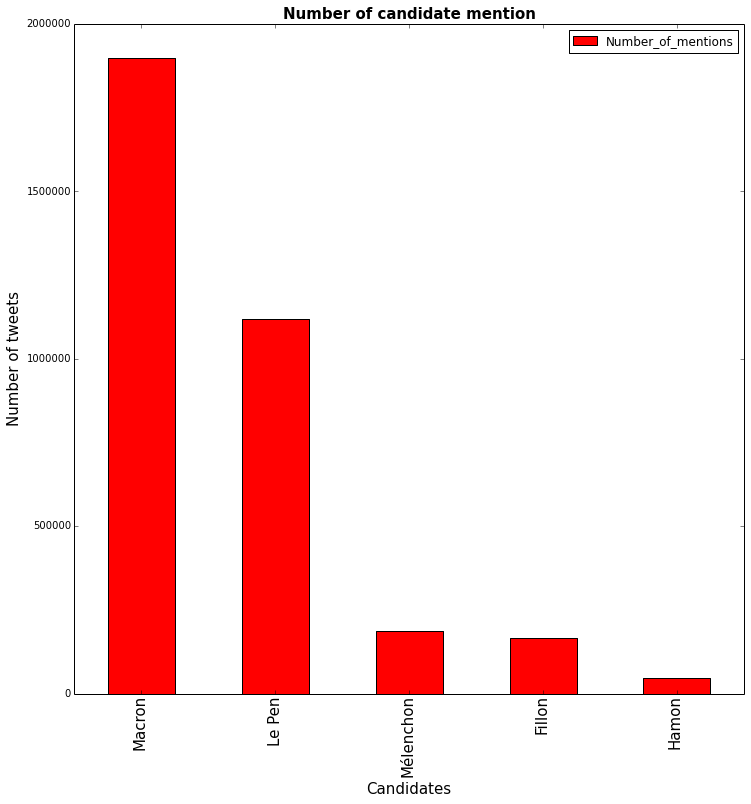

In [7]:

#Make a graph for to see the repartition
fig, ax = plt.subplots(figsize=(12,12))
#Plot time (daily timestamp)
columns_namecandidate=["day","hour"]
for i,candidate in enumerate(candidates_tags):
    columns_namecandidate.append("mention_"+candidate)
print(columns_namecandidate)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Candidates', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Number of candidate mention', fontsize=15, fontweight='bold')
df_mention.plot(ax=ax, kind='bar', color='red')

In [19]:
#Plot time (daily timestamp)
columns_namecandidate=["day","hour"]
for i,candidate in enumerate(candidates_tags):
    columns_namecandidate.append("mention_"+candidate)
print(columns_namecandidate)

['day', 'hour', 'mention_Macron', 'mention_Le Pen', 'mention_Hamon', 'mention_M\xc3\xa9lenchon', 'mention_Fillon']


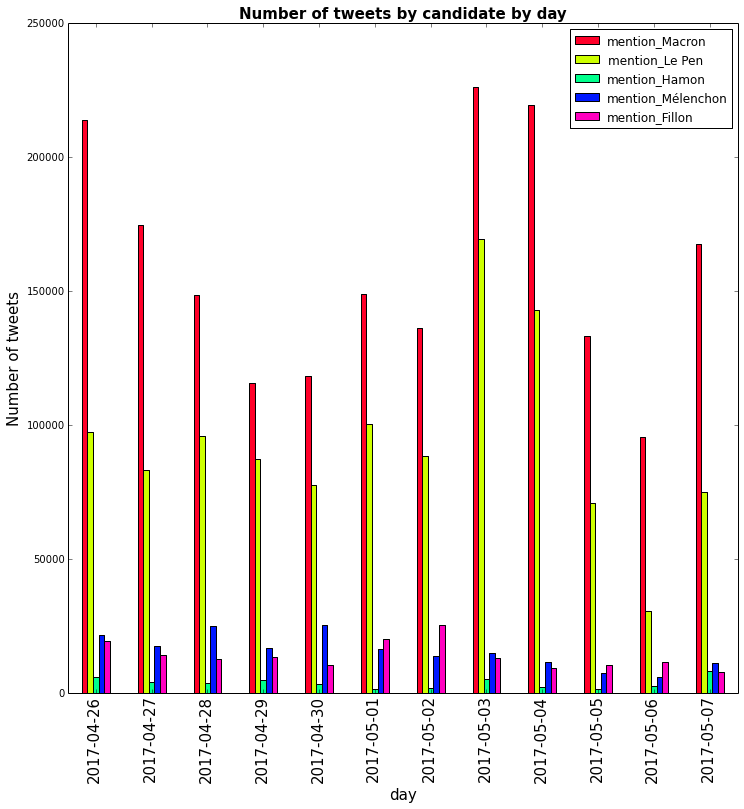

In [8]:


df_mentions=df_tweets[columns_namecandidate].copy()
df_mentions.head()
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Number of tweets by candidate by day', fontsize=15, fontweight='bold')
df_mentions_perday=df_mentions.groupby(["day"]).sum()
df_mentions_perday.plot(ax=ax, kind='bar',cmap=plt.get_cmap("gist_rainbow"))

In [9]:
#Use an heatmap approach to see who is mention with who
def inlist(elt,liste):
    try:
        liste.index(elt)
        return True
    except:
        return False

In [10]:
def test_mention(df,ref_candidate,dict_nomention):
    for candidate in dict_nomention:
        if inlist(candidate,ref_candidate):
            df=df.loc[df["mention_"+candidate]==1].copy()
        else:
            df=df.loc[df["mention_"+candidate]==0].copy()
    return df


In [11]:
list_mention_only_candidate=[]
for i,candidate in enumerate(candidates_tags):
    df_mentioncandidate=df_mentions.loc[df_mentions["mention_"+candidate]==1]
    nbr_mention=len(df_mentioncandidate)
    list_mention_whowho_candidate=[]
    df_onlycandidate=test_mention(df_mentioncandidate.copy(),[candidate],candidates_tags)
    
    list_mention_only_candidate.append(df_onlycandidate)
    
df_tot_onlycandidate=pd.concat(list_mention_only_candidate,axis=0)

print(df_tot_onlycandidate.head())
#Plot time

           day hour  mention_Macron  mention_Le Pen  mention_Hamon  \
0   2017-05-01   00               1               0              0   
8   2017-05-01   00               1               0              0   
11  2017-05-01   00               1               0              0   
12  2017-05-01   00               1               0              0   
24  2017-05-01   00               1               0              0   

    mention_Mélenchon  mention_Fillon  
0                   0               0  
8                   0               0  
11                  0               0  
12                  0               0  
24                  0               0  


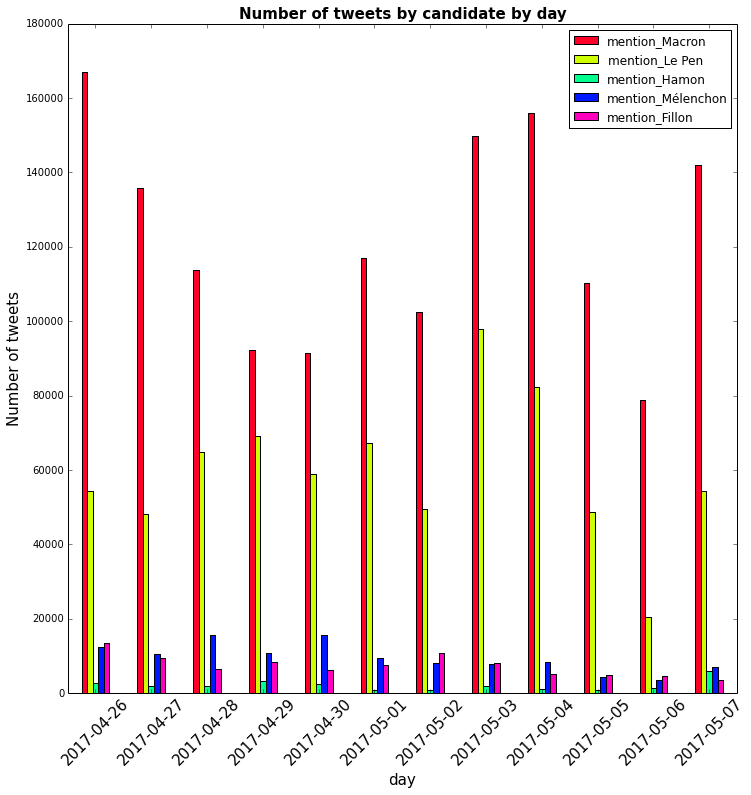

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Number of tweets by candidate by day', fontsize=15, fontweight='bold')
df_mentions_perday=df_tot_onlycandidate.groupby(["day"]).sum()
df_mentions_perday.plot(ax=ax, kind='bar',cmap=plt.get_cmap("gist_rainbow"))

_ = ax.set_xticklabels(df_mentions_perday.index,rotation=45)
    
    
        

In [13]:
df_mentions_perhour= df_tot_onlycandidate.groupby(['day','hour']).sum()
# df_counttweets=df_tot_onlycandidate.groupby(['day','hour']).size()
# df_counttweets.columns=["count_tweets"]
df_glob=pd.concat([df_mentions_perhour],axis=1)

print(df_glob.head())

                 mention_Macron  mention_Le Pen  mention_Hamon  \
day        hour                                                  
2017-04-26 00               930             495             36   
           01               628             307             15   
           02               498             288             22   
           03               729             296             14   
           04              1823             851             52   

                 mention_Mélenchon  mention_Fillon  
day        hour                                     
2017-04-26 00                  129             110  
           01                   56              66  
           02                   71              33  
           03                   76              66  
           04                  152             145  


                 mention_Macron  mention_Le Pen  mention_Hamon  \
day        hour                                                  
2017-04-26 00        930.000000      495.000000      36.000000   
           01        779.000000      401.000000      25.500000   
           02        685.333333      363.333333      24.333333   
           03        618.333333      297.000000      17.000000   
           04       1016.666667      478.333333      29.333333   

                 mention_Mélenchon  mention_Fillon  
day        hour                                     
2017-04-26 00           129.000000      110.000000  
           01            92.500000       88.000000  
           02            85.333333       69.666667  
           03            67.666667       55.000000  
           04            99.666667       81.333333  


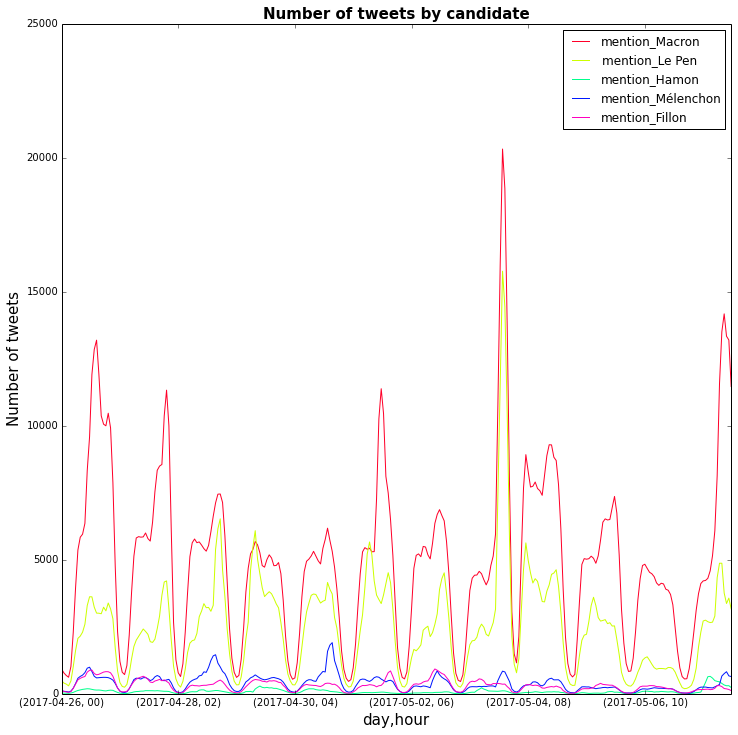

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Number of tweets by candidate', fontsize=15, fontweight='bold')
df_rollingmean=df_glob.rolling(3,min_periods=1).mean()
print(df_rollingmean.head())
#df_glob.plot(ax=ax,colormap=plt.get_cmap("gist_rainbow"))
df_rollingmean.plot(ax=ax,colormap=plt.get_cmap("gist_rainbow"))
# _ = ax.set_xticklabels(df_rollingmean.index,rotation=45)